# Lecture 20: ANOVA

## ANOVA: Analysis of Variance

Given \\(n\\) groups, we endeavor to test whether one
or more groups have different means from the others.  

Let's start by ruling out a straightforward but dangerous method of testing 
whether one or more groups have different means from the others: *pairwise null 
hypothesis tests* with a single significance level
parameter \\(\alpha\\) for each test.  For purposes of illustration 
let's assume \\(\alpha=0.05\\). 

Pairwise null hypothesis testing involves testing the null hypothesis 
\\(\bar{x}_i = \bar{x}_j\\) for each group means \\(i,j\\). If even one 
of these tests finds a significant difference between \\(\bar{x}_i = \bar{x}_j\\)
then we might be tempted to reject the overall null hypothesis that
all groups have equal means.

With \\(n\\) groups, the number of pairwise hypothesis tests grows as 
\\(\binom{n}{2}\\), which increases rapidly with \\(n\\).  
For example, with \\(n=7\\):

\\[\binom{n}{2} = \frac{n!}{2! (n-2)!} = \frac{n(n-1)}{2} = \frac{7\cdot 6}{2} = 21\\]

With 21 tests and using \\(\alpha=0.05\\), we would expect \\(0.05 \cdot 21 \approx 1\\)
false discovery.  The probability of hanving one or more pairwise 
false discoveries is given by 

\\[1-(1-\alpha)^{\binom{n}{2}}) = 1-0.95^21 \approx 0.659 \\]

If we were to reject the overall null hypothesis based on this 
procedure then approximately 66% of the 
time we would false reject the overall null hypothesis.

We could reduce the probability of a false discovery by scaling 
the $\alpha$ parameter inversely to the number of pairwise hypothesis
tests.  If \\(m\\) is the number of pairwise tests, 

\\[\alpha_{Bonferroni} = \frac{\alpha}{m} \\]

Substituting \\(\binom{n}{2}\\) for \\(m\\) yields

\\[\alpha_{Bonferroni} = \frac{2\alpha}{n(n-1)} \\]

The Bonferroni adjustment helps avoid most false discoveries, but it
also dramatically reduces the possiblity of ever achieving a sufficiently
small p-value to reject any of the pairwise hypothesis tests increasing
the risk of Type II (false negative) errors.

Now let's consider a different approach: ANalysis Of VAriance (ANOVA).

Rather than starting with pairwise null hypothesis tests, we 
construct a single test with the null hypothesis that all group
means are equal.  As is implied by the name ANalysis Of 
VAriances, we do this by 
analyzing the variance between the group means.
If the variance of the group means is sufficiently greater than
the variance we would expect under the null hypothesis then
we reject the null hypothesis.

Here's how Permutation-ANOVA works:

Let \\(N =\\) the number of samples in all groups.

Let \\(i\\) denote the \\(i^{th}\\) group.

Let \\(x_i\\) denote the samples in the \\(i^{th}\\) group

Let \\(x_i'\\) denote the \\(i^{th}\\) resample group.

For this illustration assume each of the groups have the same size \\(n_1 = n_2 = \cdots\\).

Given \\(n\\) groups, define a null hypothesis and an alternate hypothesis:
   
\\[H_0: \text{\, all groups have equal means, i.e., } \mu_1 = \mu_2 = \cdots = \mu_n\\]

\\[H_A: \text{\, at least one group in has a different mean.}\\]
   
1. Combine all groups into a single group and compute the mean
   \\(\bar{x}_{grand}\\) across all samples \\(x_i\\) in all
   groups, i.e., 

\\[\bar{x}_{grand} = \frac{1}{N} \sum_{i, j} x_{ij}\\]


2. Shuffle the data in the single group and resample 1 group \\(x'_i\\)for each of
   the original groups without replacement.  The size of each resample
   group is the same size as its corresponding original group.
3. Record the mean \\(\bar{x}_i'\\) of each resample groups.
4. Record the variance among the resample group means.

\\[s' = \frac{1}{n-1}\sum_{i=1}^n (\bar{x}_i' - \bar{x}_{grand})^2\\]

5. Repeat steps 2-4 many (e.g., \\(R =\\) 1000) times.
   
We now have \\(R\\) resampled group variances. 

6. Compute the fraction of all resampled group variances \\(s'\\) that
   are greater than the variance of the original group means \\(s\\) where

   \\[s = \frac{1}{n-1}\sum_{i=1}^n (\bar{x}_i - \bar{x}_{grand})^2\\]

7. The fraction computed in step 6 is the p-value.

Note that the version of partition ANOVA stated above assumes that each 
of the groups has the same number of samples.  If they aren't the same
then we need to weight each groups contribution to the variance
by the number of samples it contains.

In [38]:
import numpy as np
import pandas as pd

# Load the dataset
four_sessions = pd.read_csv('four_sessions.csv')

print(four_sessions.head())

observed_variance = four_sessions.groupby('Page').mean().var().iloc[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
number_of_rows = len(four_sessions)
print(f'Number of rows (samples): {number_of_rows}')


     Page  Time
0  Page 1   164
1  Page 2   178
2  Page 3   175
3  Page 4   155
4  Page 1   172
Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
Number of rows (samples): 20


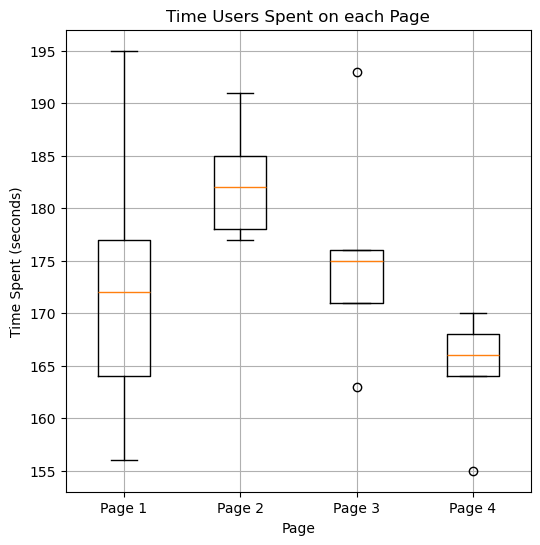

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming four_sessions is already loaded into your environment
# You may need to load your data as shown previously if starting a new session

# Create a boxplot
plt.figure(figsize=(6, 6))
plt.boxplot([four_sessions[four_sessions['Page'] == page]['Time'] for page in four_sessions['Page'].unique()],
            labels=four_sessions['Page'].unique())
plt.title('Time Users Spent on each Page')
plt.xlabel('Page')
plt.ylabel('Time Spent (seconds)')
plt.grid(True)
plt.show()


## Histogram of four sessions

I create a histogram below of the four_sessions.csv data.  There are too few samples 
to draw any conclusions from this histogram.

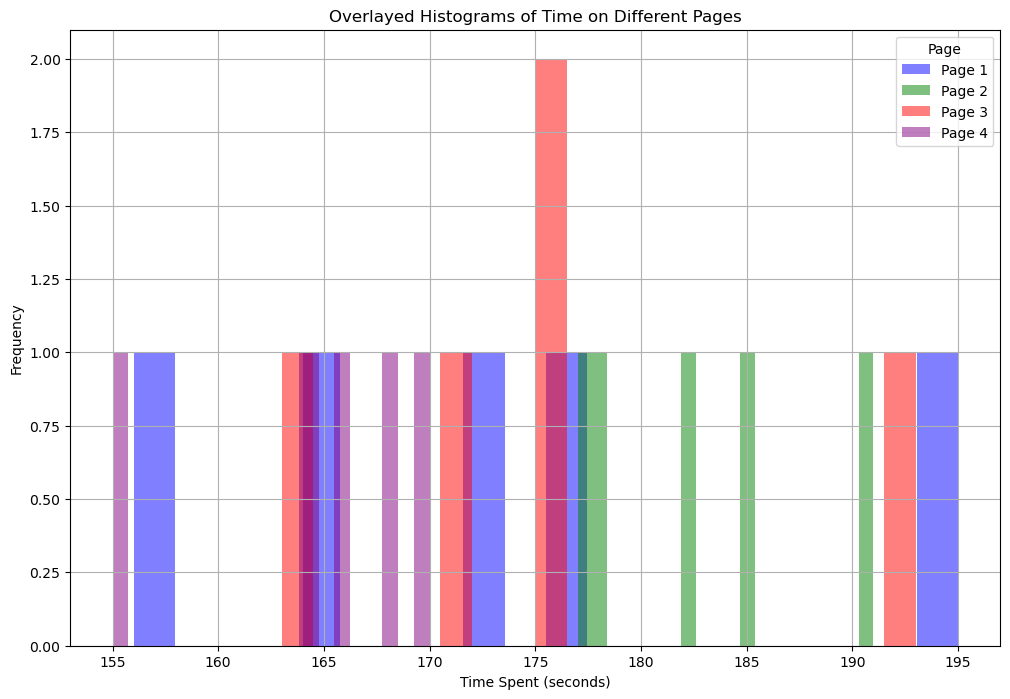

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming four_sessions is already loaded into your environment
# You may need to load your data as shown previously if starting a new session

# Set the figure size and create an empty plot
plt.figure(figsize=(12, 8))

# Colors for different pages
colors = ['blue', 'green', 'red', 'purple']

# Loop through each page, plotting the histogram
for i, page in enumerate(four_sessions['Page'].unique()):
    subset = four_sessions[four_sessions['Page'] == page]['Time']
    plt.hist(subset, bins=20, alpha=0.5, label=page, color=colors[i])

# Adding title and labels
plt.title('Overlayed Histograms of Time on Different Pages')
plt.xlabel('Time Spent (seconds)')
plt.ylabel('Frequency')
plt.legend(title='Page')
plt.grid(True)

# Show the plot
plt.show()


In [45]:
np.random.seed(17)   # to make the results repeatable.

def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var().iloc[0]

perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('P-value', np.mean([var > observed_variance for var in perm_variance]))

P-value 0.08166666666666667


In [42]:
# The above code for computing the p-value is quite terse, so let's break it down
# into pieces.

#perm_variance = [perm_test(four_sessions) for _ in range(3000)]

# The list comprehension above is equivalent to
perm_variance = []
for _ in range(3000):
    perm_variance.append(perm_test(four_sessions))
 
#np.mean([var > observed_variance for var in perm_variance])
# The mean computation above works by creating a list of Falses 
# and Trues in which each False corresponds to a variance less than
# or equal to the observed variance and each true corresponds to a 
# variance more extreme than the observed variance.  For the purposes
# of computing a mean, it treats each True as a one, and each False
# as a zero.
print ([var > observed_variance for var in perm_variance][:10])
print(f"np.mean([True, False, False]) = {np.mean([True, False, False])}")

[False, False, False, False, False, False, False, False, False, False]
np.mean([True, False, False]) = 0.3333333333333333


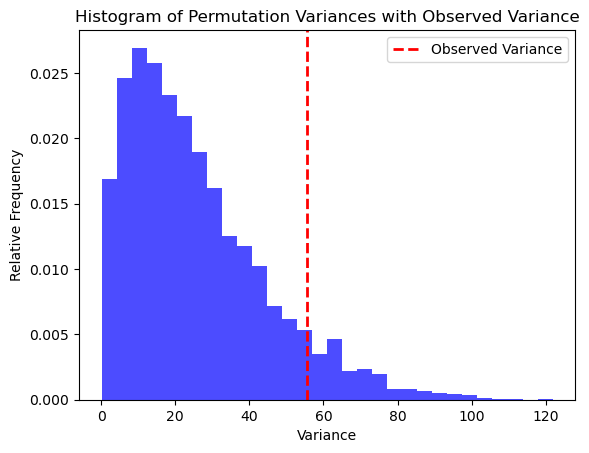

In [43]:
import matplotlib.pyplot as plt

# Assuming perm_variance is your list of variance values from the permutation test
# And observed_variance is the variance calculated from the actual data

# Plot the histogram
plt.hist(perm_variance, bins=30, color='blue', alpha=0.7, density=True)
plt.title('Histogram of Permutation Variances with Observed Variance')
plt.xlabel('Variance')
plt.ylabel('Relative Frequency')

# Overlay the observed variance as a vertical line
plt.axvline(x=observed_variance, color='red', linestyle='dashed', linewidth=2, label='Observed Variance')

# Add a legend
plt.legend()

# Show the plot
plt.show()



In the figure above, the distribution of permutation variances reveals a tail with
a significant number of samples more extreme than the observed variance bewteen
the original group means.  This accounts for the \\(\approx 0.082\\) p-value.

Since we chose a significance level \\(\alpha\\) of 0.05, we would NOT reject the
null hypothesis.  We lack sufficient evidence to declare that the observed variance
is outside that which could be caused by randomness.